# Exercise Sheet for Interpolation and Approximation
----------------------------------------------------------

In [11]:
#load some python packages you will need
import numpy as np                 #this helps compute things
import matplotlib.pyplot as plt    #this helps plot things
import math 

### Enter your student ID number below, this will be used for a reproducable random number seed.

In [3]:
sid = 12221258  #  *** change this to your student number ***
seed = np.random.seed(sid)

----------------------------------------------------------

## Question 1
### a) Compute via interpolation and plot the Lagrange polynomial p(x) to $f(x) = cos(-2\pi x) + 0.4x^2$ over
### $(x_i,y_i) = [(7.2,21.04),(7.4,21.12),(7.6,22.39),(7.8,24.77]$ 


### b) Estimate the maximum absolute error bound for this Lagrange polynomial approximation over $\xi \in [x_0,x_n]$

In [4]:
x = np.arange(7,8,0.001)   #dummy range for function
y = np.cos(-2*np.pi*x) +0.4*x**2  #function f(x)


In [5]:
xi = np.array((7.2,7.4,7.6,7.8))   # points for interpolation
yi = y[np.digitize(xi,x)]


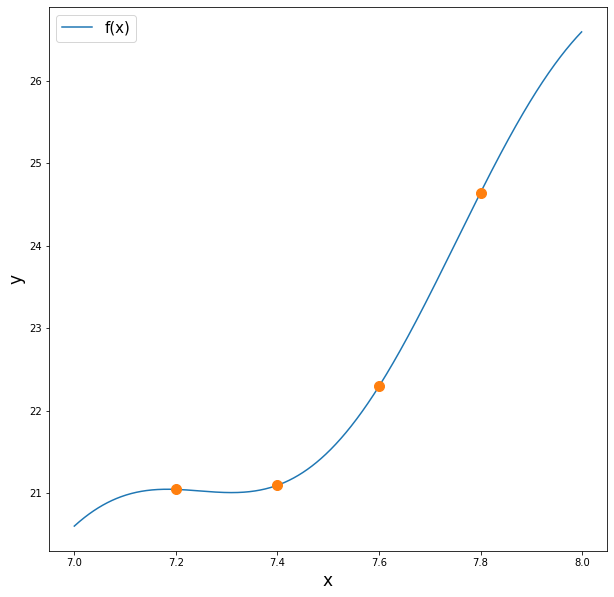

In [6]:
plt.figure(figsize=(10,10))
plt.plot(x,y,label='f(x)')  
plt.plot(xi,yi,'o',markersize=10)
plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)
plt.legend(loc='best',fontsize=15)


p(x) = -1.666666666622733x^3 + 51.87499999901155x^2 + -490.5083333259235x + 1485.5799999814906
Coefficients: [  -1.66666667   51.875      -490.50833333 1485.57999998]


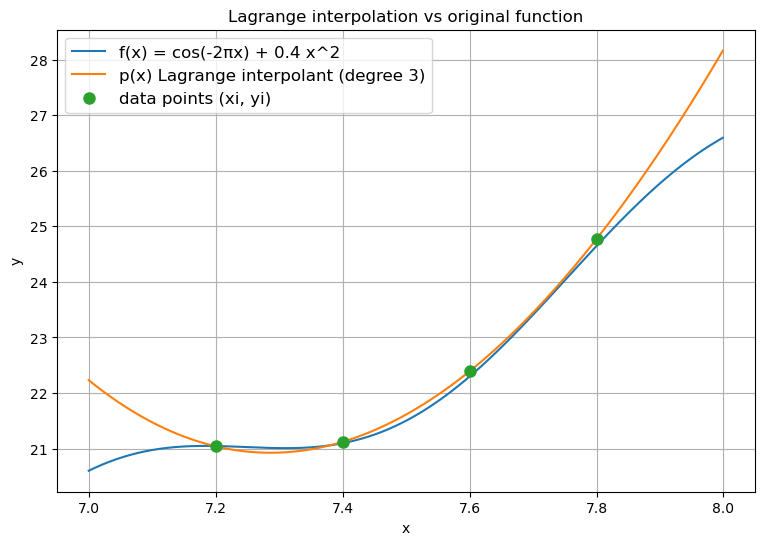

In [44]:
# data points 
# xi: x-values of interpolation nodes
# yi: y-values at those nodes 
xi = np.array([7.2, 7.4, 7.6, 7.8])
yi = np.array([21.04, 21.12, 22.39, 24.77])

# function (for comparison)
def f(x):
    return np.cos(-2 * np.pi * x) + 0.4 * x**2

# construct the Lagrange basis and interpolant 
# compute k-th Lagrange basis polynomial L_k(x) for xi (nodes); gives values for L_k(x) 
# L_i = product (x - xj) / (xi - xj)
def lagrange_basis(x, xi, k): 
    x = np.asarray(x) # makes array, no copy if already array  
    L = np.ones_like(x, dtype=float) # makes array of ones in size of x, to start product 
    xk = xi[k]
    for j, xj in enumerate(xi): # gives index and value 
        if j == k:
            continue
        L *= (x - xj) / (xk - xj)
    return L

# calculate Lagrange interpolationg polynomial p(x) at x 
# p(x) = sum yi * L_i 
def lagrange_interpolant(x, xi, yi): 
    x = np.asarray(x)
    p = np.zeros_like(x, dtype=float) # like ones_like, array of zeros, to start sum 
    for k in range(len(xi)):
        p += yi[k] * lagrange_basis(x, xi, k) # sum 
    return p

# prepare dense evaluation grid 
x = np.arange(7.0, 8.0, 0.001)
y = f(x)
px = lagrange_interpolant(x, xi, yi)

# print polynomial in coefficient form  
# Build polynomial coefficients by expanding the Lagrange form 
# We can get coefficients (a_k) by fitting a polynomial of degree n-1 through the nodes 
coeffs = np.polyfit(xi, yi, deg=len(xi)-1)  # highest->lowest
p_polynom = np.poly1d(coeffs)

print("p(x) = {}x^3 + {}x^2 + {}x + {}".format(*coeffs))
print("Coefficients:", coeffs)

plt.figure(figsize=(9,6))
plt.plot(x_plot, f_vals, label='f(x) = cos(-2πx) + 0.4 x^2')
plt.plot(x_plot, p_vals, label='p(x) Lagrange interpolant (degree {})'.format(len(xi)-1))
plt.plot(xi, yi, 'o', markersize=8, label='data points (xi, yi)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange interpolation vs original function')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()

In [46]:
# Compute actual interpolation error 
abs_error = np.abs(y - px)
max_error = np.max(abs_error)

# Theoretical error bound 
# f^(n+1)(x) = (2*pi)^4 * cos(2*pi*x)
max_term1 = (2 * np.pi)**4  # max |f^(n+1)(x)|
term2 = (x - xi[0]) * (x - xi[1]) * (x - xi[2]) * (x - xi[3])
max_term2 = np.max(np.abs(term2))
error_bound = (max_term1 / math.factorial(4)) * max_term2

print("Lagrange interpolation (degree 3)")
print(f"Theoretical error bound:", error_bound)
print("Max error |f(x) - p(x)|: ", max_error)

Lagrange interpolation (degree 3)
Theoretical error bound: 2.4936727304704647
Max error |f(x) - p(x)|:  1.6300000000000168


Theoretical error bound: hypothetical worst case scenario \
Max error: actual biggest error, calculated numerically \
max error < Theoretical error: Lagrange interpolation was successful 

----------------------------------------------------------

## Question 2
### Assume linear interpolation with step size $\textbf{d}$ is used to approximate $y(x) = \pi x^7$
### What step size for linear interpolation do you need to have for an absolute error $E_{max} < 10^{-6}$?

----------------------------------------------------------

## Question 3
### When using Taylor polynomials to approximate $y = cos(-3 \pi x) + 3x$ over the range $x = [-0.25,0.25]$, about $x= 0$;  to what order $j$ would you need to compute the interpolating polynomial in order to keep the maximum absolute error smaller than $E_{j}(x) < 10^{-6}$?

Text(0, 0.5, 'y')

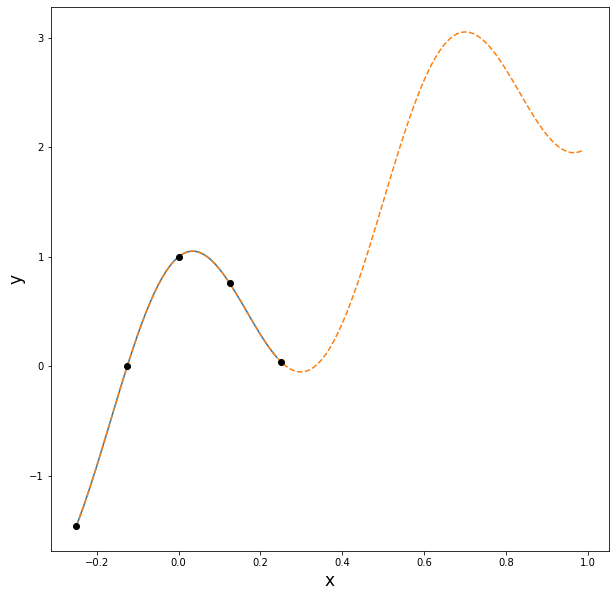

In [10]:
xi = np.arange(-0.25,1,0.01)
xdum = np.arange(-0.25,0.25,0.01)
x = np.array([-0.25,-0.125,0,0.125,0.25])
y = np.cos(-3*np.pi*x) + 3*x
ydum = np.cos(-3*np.pi*xdum) + 3*xdum
yi = np.cos(-3*np.pi*xi) + 3*xi
plt.figure(figsize=(10,10))
plt.plot(xdum,ydum)
plt.plot(xi,yi,'--')
plt.plot(x,y,'o',c='black')
plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)

----------------------------------------------------------

## Question 4
## Use bilinear interpolation to determine the value of the function $f(x,y) = z$  at the point $(x_r, y_r)$, given the below four data points $x_i, y_i$ with values $z_{i} = f(x_i,y_i)$


Text(0.2952258316506029, 0.7466788465348048, '($x_r,y_r)$')

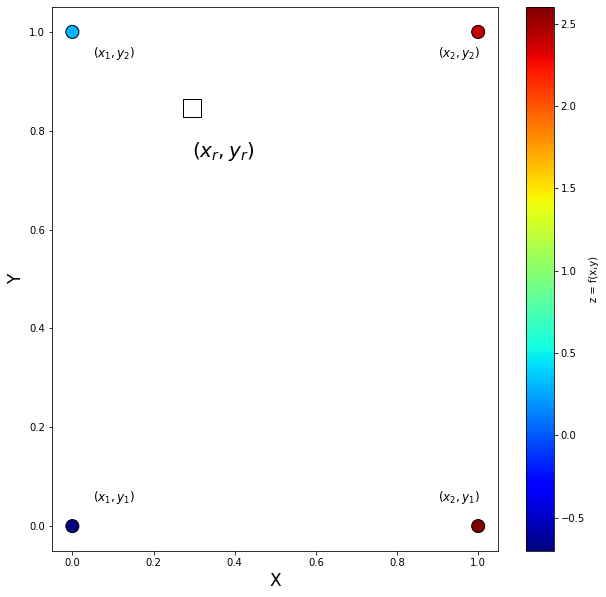

In [12]:
#Known data points and function values.  Listed clockwise from the x_1,y_1 = (0,0) point.
xi = np.array([0,0,1,1])  #x_1,x_1,x_2,x_2
yi = np.array([0,1,1,0])  #y_1,y_2,y_2,y_1
zi = np.array([-0.7,0.3,2.4,2.6])  

#Randomly generate coordinates to find function value (z = f(x,y)) at 
xr = np.random.uniform()
yr = np.random.uniform()

#Visualize
plt.figure(figsize=(10,10))
plt.scatter(xi,yi,c=zi,s=170,marker='o',cmap='jet',edgecolor='black')
plt.colorbar(label='z = f(x,y)')
plt.xlabel('X',fontsize=17)
plt.ylabel('Y',fontsize=17)
plt.scatter(xr,yr,edgecolor='black',marker='s',s=290,c='white')
plt.text(0.05,0.05,'($x_1,y_1)$',fontsize=12)
plt.text(0.05,0.95,'($x_1,y_2)$',fontsize=12)
plt.text(0.9,0.95,'($x_2,y_2)$',fontsize=12)
plt.text(0.9,0.05,'($x_2,y_1)$',fontsize=12)
plt.text(xr,yr-0.1,'($x_r,y_r)$',fontsize=20)



